# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Открытие файла с данными и изучение общей информации. 

Импортирую библиотеки. И открываю файл.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
pd.options.display.float_format='{:2f}'.format

Вывожу первые строки датафрейма, основную информацию и строю гистограммы по таблице.

In [3]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,NaN,11.000000,18.600000,1,NaN,...,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,NaN,5.000000,34.300000,4,NaN,...,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,NaN,14.000000,NaN,9,NaN,...,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,NaN,12.000000,14.400000,5,NaN,...,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,NaN,26.000000,10.600000,6,NaN,...,14.400000,1.000000,посёлок Парголово,52996.000000,19143.000000,0.000000,NaN,0.000000,NaN,155.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,NaN,24.000000,NaN,22,NaN,...,18.900000,2.000000,Санкт-Петербург,23982.000000,11634.000000,0.000000,NaN,0.000000,NaN,NaN
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,NaN,27.000000,15.430000,26,NaN,...,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000000
9,18,5400000.000000,61.000000,2017-02-26T00:00:00,3,2.500000,9.000000,43.600000,7,NaN,...,6.500000,2.000000,Санкт-Петербург,50898.000000,15008.000000,0.000000,NaN,0.000000,NaN,289.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541548.771552,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887013.267545,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12190.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.000000,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650000.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800000.000000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


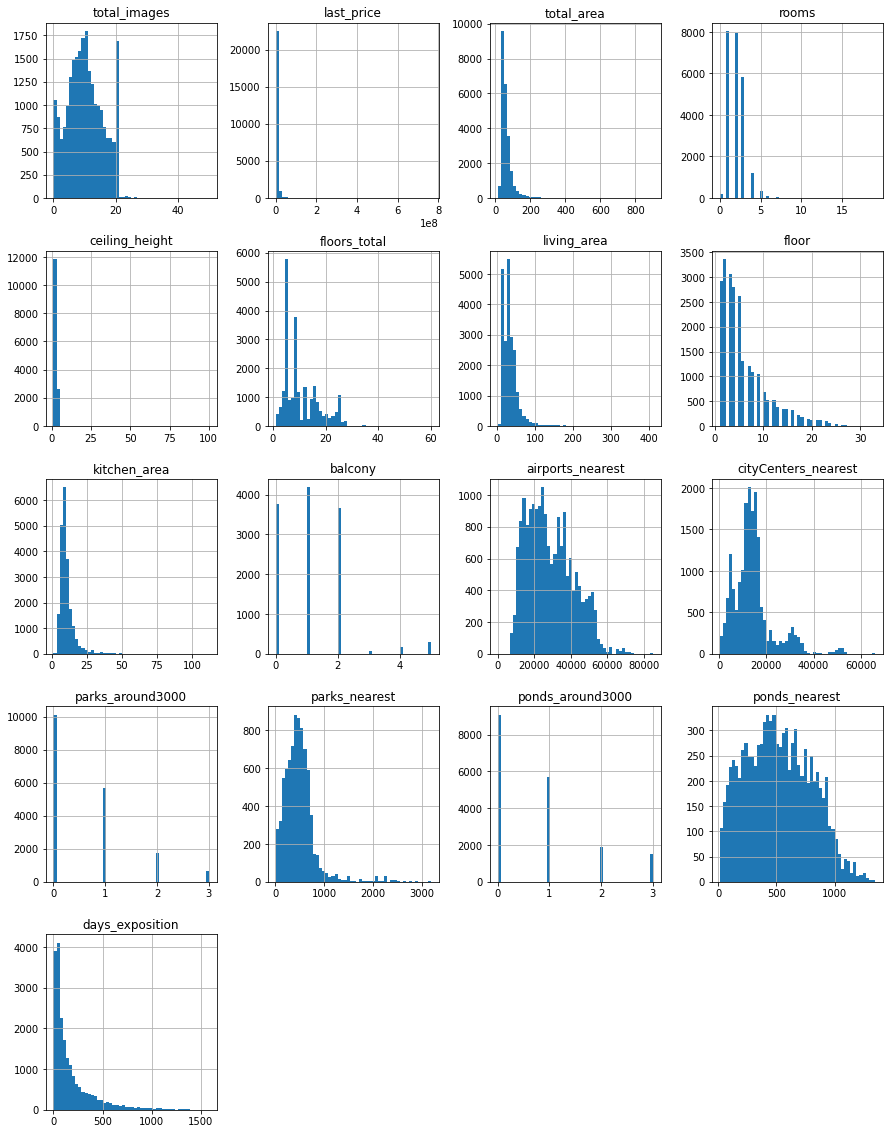

In [6]:
data.hist(figsize=(15, 20), bins=50)
plt.show()

При рассмотрении общей информации о датафрейме, можно уже сказать, что в данных много пропусков, в некоторых стобцах вместо значений указан NaN, есть несоответствие типов данных и присутствуют аномальные значения.

### Предобработка данных

**Проверяю столбцы в которых есть пропуски**

Cчитаю пропущенные значения и вывожу количество только для этих столбцов

In [7]:
missing_val_count_by_column = (data.isna().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

Вывожу процентный список пропущенных данных

In [8]:
columns = []
percents = []
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    if pct_missing > 0:
        percent = round(pct_missing * 100, 2)
        print(f'{col} - {percent}%')
        columns.append(col)
        percents.append(percent)

ceiling_height - 38.8%
floors_total - 0.36%
living_area - 8.03%
is_apartment - 88.29%
kitchen_area - 9.61%
balcony - 48.61%
locality_name - 0.21%
airports_nearest - 23.38%
cityCenters_nearest - 23.29%
parks_around3000 - 23.28%
parks_nearest - 65.91%
ponds_around3000 - 23.28%
ponds_nearest - 61.56%
days_exposition - 13.42%


В 14 столбцах обнаружены пропущенные значения, в трех столбцах пропуски превышают даже 50%, необходимо изучить данные пропуски для каждого столбца и заполнить пропущенные значения, там где это возможно. А также изучить данные на наличие аномальных значений.

**Анализирую пропуски, типы данных, уникальные и выбивающиеся значения, а также заполняю пропущенные значения, там где это возможно**

Пропуски в колонке `balcony` говорят о том, что продавец не указал число балконов, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [9]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

Меняю вещественный тип данных в столбце `balcony` на целочисленный, так как количество балконов указывается в целых числах

In [10]:
data['balcony'] = data['balcony'].astype('int')

В столбце `balcony` замечены выбивающиеся значения, например, в 1-й или 2-х комнатных квартирах, количество балконов указано 5 штук. Приравняю количество балконов к количеству комнат в строках, в которых данные выбиваются.

In [11]:
data[data['balcony'] == 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.000000,74.000000,2016-05-04T00:00:00,3,NaN,14.000000,59.000000,8,False,...,12.000000,5,Санкт-Петербург,37715.000000,12612.000000,1.000000,725.000000,1.000000,759.000000,179.000000
42,13,22000000.000000,161.800000,2015-07-08T00:00:00,4,2.800000,4.000000,80.900000,2,False,...,17.600000,5,Петергоф,35416.000000,30605.000000,2.000000,47.000000,1.000000,907.000000,987.000000
116,18,10999000.000000,97.200000,2017-11-13T00:00:00,3,2.500000,16.000000,NaN,16,NaN,...,18.300000,5,Санкт-Петербург,19426.000000,21138.000000,0.000000,NaN,2.000000,390.000000,394.000000
267,2,14700000.000000,120.000000,2018-09-07T00:00:00,3,2.750000,20.000000,63.000000,18,NaN,...,16.000000,5,Санкт-Петербург,39204.000000,10430.000000,2.000000,627.000000,3.000000,77.000000,61.000000
311,20,12500000.000000,86.000000,2018-10-19T00:00:00,3,2.800000,25.000000,47.000000,3,NaN,...,13.000000,5,Санкт-Петербург,52192.000000,15686.000000,0.000000,NaN,1.000000,441.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,8,5780000.000000,55.000000,2017-11-23T00:00:00,2,2.550000,10.000000,28.600000,8,False,...,8.000000,5,Санкт-Петербург,42447.000000,11146.000000,1.000000,451.000000,0.000000,NaN,41.000000
23289,13,7000000.000000,88.000000,2018-03-02T00:00:00,3,2.500000,15.000000,54.000000,12,False,...,12.000000,5,Колпино,24501.000000,30287.000000,1.000000,372.000000,0.000000,NaN,NaN
23363,10,4300000.000000,52.000000,2019-04-21T00:00:00,1,2.700000,16.000000,28.000000,8,False,...,11.000000,5,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23526,14,5800000.000000,60.690000,2018-03-13T00:00:00,3,2.500000,9.000000,39.700000,2,NaN,...,6.200000,5,Санкт-Петербург,51239.000000,15954.000000,0.000000,NaN,0.000000,NaN,30.000000


In [12]:
for amount in data['rooms'].index:
    if data.loc[amount, 'rooms'] < data.loc[amount, 'balcony']:
        data.loc[amount, 'balcony'] = data.loc[amount, 'rooms']

In [13]:
data['balcony'].unique()

array([0, 1, 2, 3, 4, 5])

Теперь 5 балконов только в 7 квартирах, в которых количество комнат от 5 и выше.

In [14]:
data['balcony'].value_counts()

0    15391
1     5693
2     2255
3      307
4       46
5        7
Name: balcony, dtype: int64

In [15]:
data[data['balcony'] == 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1307,20,26558000.000000,152.380000,2017-01-11T00:00:00,5,2.750000,17.000000,NaN,12,NaN,...,14.610000,5,Санкт-Петербург,39140.000000,10364.000000,2.000000,173.000000,3.000000,196.000000,625.000000
6509,9,30000000.000000,198.900000,2017-11-08T00:00:00,5,3.100000,20.000000,109.000000,16,NaN,...,23.000000,5,Санкт-Петербург,10015.000000,10263.000000,2.000000,587.000000,0.000000,NaN,524.000000
10684,6,32894076.000000,364.700000,2019-05-02T00:00:00,7,3.320000,3.000000,NaN,1,NaN,...,NaN,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14485,3,9900000.000000,183.000000,2017-02-09T00:00:00,5,2.830000,14.000000,112.000000,4,False,...,14.000000,5,Санкт-Петербург,10997.000000,11082.000000,0.000000,NaN,1.000000,418.000000,129.000000
15876,17,20500000.000000,165.200000,2018-09-03T00:00:00,5,2.910000,18.000000,112.200000,18,NaN,...,16.500000,5,Санкт-Петербург,37310.000000,9782.000000,1.000000,497.000000,0.000000,NaN,NaN
21831,17,21900000.000000,220.000000,2016-05-04T00:00:00,5,NaN,4.000000,110.000000,4,False,...,17.000000,5,Санкт-Петербург,37322.000000,12219.000000,1.000000,739.000000,2.000000,752.000000,125.000000
21955,19,130000000.000000,431.000000,2017-10-02T00:00:00,7,3.700000,8.000000,220.000000,5,NaN,...,20.000000,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.000000


Пропусков в колонке `is_apartment` 88%, это говорит о том, что продавец не указал является ли жилье апартаментами, возможно продавец скрывает данный факт, либо на рынке недвижимости Санкт-Петербурга действительно представлен малый процент апартаментов. Проверить данную информацию не предоставляется возможным, поэтому все пропуски заменяю на `False`.

In [16]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

Меняю тип данных в `is_apartment` на булев тип.

In [17]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Пропуски в колонке `parks_around3000`, вероятнее всего говорят о картографической ошибке, думаю правильным решением будет оставить данные пропуски, но я все же заменю значения в пропусках на 0, чтобы все значения были заполнены и изменю тип данных на целочисленный.

In [18]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [19]:
data['parks_around3000'].fillna(0, inplace=True)
data['parks_around3000'].isna().sum()

0

In [20]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

Пропуски в колонке `parks_nearest` обоснованы, так как они находятся в строках в которых либо не было указано количество парков, либо в строках, где количество парков 0. Возможно не совсем верно будет заменить пропуски в расстояниях на 0, но все же заполню пропуски с условием, что если парков 0, то и расстояние до парков равняется 0.

In [21]:
data[data['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,NaN,11.000000,18.600000,1,False,...,11.000000,1,посёлок Шушары,12817.000000,18603.000000,0,NaN,0.000000,NaN,81.000000
5,10,2890000.000000,30.400000,2018-09-10T00:00:00,1,NaN,12.000000,14.400000,5,False,...,9.100000,0,городской посёлок Янино-1,NaN,NaN,0,NaN,NaN,NaN,55.000000
6,6,3700000.000000,37.300000,2017-11-02T00:00:00,1,NaN,26.000000,10.600000,6,False,...,14.400000,1,посёлок Парголово,52996.000000,19143.000000,0,NaN,0.000000,NaN,155.000000
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,NaN,24.000000,NaN,22,False,...,18.900000,2,Санкт-Петербург,23982.000000,11634.000000,0,NaN,0.000000,NaN,NaN
8,20,2900000.000000,33.160000,2018-05-23T00:00:00,1,NaN,27.000000,15.430000,26,False,...,8.810000,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,189.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.000000,72.900000,2016-10-13T00:00:00,2,2.750000,25.000000,40.300000,7,False,...,10.600000,1,Санкт-Петербург,19424.000000,4489.000000,0,NaN,1.000000,806.000000,519.000000
23692,2,1350000.000000,30.000000,2017-07-07T00:00:00,1,NaN,5.000000,17.500000,4,False,...,6.000000,0,Тихвин,NaN,NaN,0,NaN,NaN,NaN,413.000000
23695,14,3100000.000000,59.000000,2018-01-15T00:00:00,3,NaN,5.000000,38.000000,4,False,...,8.500000,0,Тосно,NaN,NaN,0,NaN,NaN,NaN,45.000000
23696,18,2500000.000000,56.700000,2018-02-11T00:00:00,2,NaN,3.000000,29.700000,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,NaN,NaN,NaN


In [22]:
for i in data['parks_around3000'].index:
    if data.loc[i, 'parks_around3000'] == 0:
        data.loc[i, 'parks_nearest'] = data.loc[i, 'parks_around3000']

In [23]:
data['parks_nearest'].isna().sum()

0

В колонке `ponds_around3000`, аналогичная ситуация, как и в колонке `park_around3000`, думаю пропуски указывают на картографическую ошибку, но все же заполняю пропуски 0 и меняю тип данных на целочисленный..

In [24]:
data['ponds_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].isna().sum()

0

In [25]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Пропуски в колонке `ponds_nearest` обоснованы, так как они находятся в строках в которых либо не было указано количество водоемов, либо в строках, где количество равняется 0. Так же, как и в случае, с расстоянием до парков, заполню пропуски по условию, если водоемов 0, то и расстояние до водоемов равняется 0.

In [26]:
for i in data['ponds_around3000'].index:
    if data.loc[i, 'ponds_around3000'] == 0:
        data.loc[i, 'ponds_nearest'] = data.loc[i, 'ponds_around3000']

In [27]:
data['ponds_nearest'].isna().sum()

0

Пропусков в `floors_total` всего 0,36%, думаю, вряд ли есть возможность узнать о количестве этажей в данных зданиях, т.к. нет никаких значений по которым можно было бы это предположить. Думаю правильнее будет их удалить, такой малый процент не повлияет на результат расчетов в дальнейшем.

In [28]:
data.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.000000,65.200000,2018-10-02T00:00:00,2,NaN,NaN,30.800000,4,False,...,12.000000,0,Санкт-Петербург,39197.000000,12373.000000,1,123.000000,0,0.000000,49.000000
237,4,2438033.000000,28.100000,2016-11-23T00:00:00,1,NaN,NaN,20.750000,1,False,...,NaN,0,Санкт-Петербург,22041.000000,17369.000000,0,0.000000,1,374.000000,251.000000
457,4,9788348.000000,70.800000,2015-08-01T00:00:00,2,NaN,NaN,38.400000,12,False,...,10.630000,0,Санкт-Петербург,37364.000000,8322.000000,2,309.000000,2,706.000000,727.000000
671,4,6051191.000000,93.600000,2017-04-06T00:00:00,3,NaN,NaN,47.100000,8,False,...,16.800000,0,Санкт-Петербург,22041.000000,17369.000000,0,0.000000,1,374.000000,123.000000
1757,5,3600000.000000,39.000000,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.000000,11618.000000,1,835.000000,1,652.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.000000,63.500000,2017-05-24T00:00:00,2,2.800000,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.000000,15363.000000,0,0.000000,1,853.000000,512.000000
22656,4,4574160.000000,64.500000,2017-04-02T00:00:00,2,NaN,NaN,31.700000,20,False,...,14.400000,0,Санкт-Петербург,22041.000000,17369.000000,0,0.000000,1,374.000000,127.000000
22808,0,14569263.000000,110.400000,2016-11-20T00:00:00,3,NaN,NaN,45.380000,6,False,...,23.420000,0,Санкт-Петербург,19095.000000,4529.000000,0,0.000000,0,0.000000,260.000000
23590,0,21187872.000000,123.300000,2017-04-25T00:00:00,3,NaN,NaN,50.400000,18,False,...,23.600000,0,Санкт-Петербург,19095.000000,4529.000000,0,0.000000,0,0.000000,104.000000


In [29]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

Заменю тип данных в колонке `floors_total` на целочисленный, так как количество этажей указывается только в виде целых чисел. Каких-либо выбивающихся значений в данной колонке не наблюдаю.

In [30]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [31]:
data['floors_total'] = data['floors_total'].astype('int')

Смущает количество этажей в зданиях с этажностью выше 50. Но предположу, что это действительно так. Данные строки оставлю без изменений.

In [32]:
data[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.000000,45.500000,2018-06-28T00:00:00,2,2.880000,60,27.400000,4,False,...,7.400000,0,Кронштадт,67763.000000,49488.000000,2,342.000000,3,614.000000,166.000000
16731,9,3978000.000000,40.000000,2018-09-24T00:00:00,1,2.650000,52,10.500000,18,False,...,14.000000,0,Санкт-Петербург,20728.000000,12978.000000,1,793.000000,0,0.000000,45.000000


Дополнительно проверяю, не присутствуют ли значения в строках в которых общая этажность дома ниже этажа квартиры. Не присутствует.

In [33]:
data[data['floors_total'] < data['floor']].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Пропусков с столбце `locality_name` 0,21%, данные пропуски удаляю, так как они не повлияют на дальнейшие расчеты и заполнить их не предоставляется возможным.

In [34]:
data.query('locality_name.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.000000,81.700000,2016-04-15T00:00:00,3,3.550000,5,50.800000,2,False,...,8.800000,0,NaN,23478.000000,4258.000000,0,0.000000,0,0.000000,147.000000
2033,6,5398000.000000,80.000000,2017-05-30T00:00:00,3,NaN,4,42.600000,2,False,...,18.600000,0,NaN,NaN,NaN,0,0.000000,0,0.000000,34.000000
2603,20,3351765.000000,42.700000,2015-09-20T00:00:00,1,NaN,24,15.600000,3,False,...,10.700000,0,NaN,22041.000000,17369.000000,0,0.000000,1,374.000000,276.000000
2632,2,5130593.000000,62.400000,2015-10-11T00:00:00,2,NaN,24,33.100000,21,False,...,8.200000,0,NaN,22041.000000,17369.000000,0,0.000000,1,374.000000,256.000000
3574,10,4200000.000000,46.500000,2016-05-28T00:00:00,2,NaN,5,30.800000,5,False,...,6.500000,0,NaN,27419.000000,8127.000000,0,0.000000,1,603.000000,45.000000
4151,17,17600000.000000,89.500000,2014-12-09T00:00:00,2,3.000000,8,39.620000,7,False,...,13.380000,0,NaN,25054.000000,3902.000000,1,485.000000,3,722.000000,869.000000
4189,7,9200000.000000,80.000000,2015-12-10T00:00:00,3,4.000000,4,52.300000,3,False,...,10.400000,0,NaN,21774.000000,3039.000000,1,690.000000,1,953.000000,223.000000
4670,1,5500000.000000,83.000000,2015-08-14T00:00:00,3,NaN,7,NaN,6,False,...,NaN,0,NaN,26534.000000,5382.000000,1,446.000000,1,376.000000,350.000000
5343,19,13540000.000000,85.500000,2016-01-20T00:00:00,3,NaN,7,59.100000,5,False,...,8.300000,3,NaN,10556.000000,9538.000000,1,67.000000,0,0.000000,303.000000
5707,7,3700000.000000,30.000000,2016-04-29T00:00:00,1,NaN,24,20.000000,23,False,...,NaN,0,NaN,21460.000000,16788.000000,0,0.000000,1,170.000000,49.000000


In [35]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

В столбце с названиями населенных пунктов `locality_name` есть неявные дубликаты, например «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [36]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В исходном датасете 364 уникальных значения с названиями населенных пунктов.

In [37]:
data['locality_name'].nunique()

364

Все названия населенных пунктов начинаются с символов в верхнем регистре, поэтому создаю функцию, которая возвращает название в верхнем регистре и устраняю неявные дубликаты. 

In [38]:
def location(location):
    for row in range(len(location)):
        if location[row].isupper():
            return location[row: len(location)]

In [39]:
data['locality_name'] = data['locality_name'].apply(location)

После устранения неявных дубликатов, количество уникальных значений в колонке `locality_name` снизилось до 305.

In [40]:
data['locality_name'].nunique()

305

Пропуски в столбце `airports_nearest`, это картографическая ошибка, заполню часть пропусков по средним значениям в зависимости от населенного пункта. В ходе выполнения кода заполнилось 92 пропуска. Оставшиеся пропуски в колонке оставляю, так как если удалять данные значения, то они могут повлиять на дальнейшие расчеты в других колонках.

In [41]:
data['airports_nearest'].isna().sum()

5524

In [42]:
for mean in data['locality_name'].unique():
    data.loc[(data['locality_name'] == mean) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == mean), 'airports_nearest'].mean()

In [43]:
data['airports_nearest'].isna().sum()

5432

Пропуски в столбце `cityCenters_nearest` также заполняю по средним значениям в зависимости от населенного пункта. В ходе выполнения кода заполнились 69 пропусков. Оставшиеся пропуски в колонке оставляю, так как если удалять данные значения, то они могут повлиять на дальнейшие расчеты в других колонках.

In [44]:
data['cityCenters_nearest'].isna().sum()

5501

In [45]:
for mean in data['locality_name'].unique():
    data.loc[(data['locality_name'] == mean) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == mean), 'cityCenters_nearest'].mean()

In [46]:
data['cityCenters_nearest'].isna().sum()

5432

В столбце `ceiling_height` наблюдаются выбивающиеся значения. Указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Также удивляют потолки ниже 2-х метров, вероятнее всего, пользователь допустил ошибкую. Думаю, лучше всего заполнить пропуски медианным значением в зависимости от населеного пункта.

In [47]:
data['ceiling_height'].describe()

count   14481.000000
mean        2.771283
std         1.261983
min         1.000000
25%         2.510000
50%         2.650000
75%         2.800000
max       100.000000
Name: ceiling_height, dtype: float64

In [48]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Заполняю пропуски медианным значением в зависимости от населенного пункта.

In [49]:
for mean in data['locality_name'].unique():
    data.loc[(data['locality_name'] == mean) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == mean), 'ceiling_height'].median()

In [50]:
data['ceiling_height'].isna().sum()

95

Оставшиеся 95 пропусков заполню с помощью метода `where` медианным значением.

In [51]:
data['ceiling_height'] = data.where(data['ceiling_height'] != 'NaN', data['ceiling_height'].median())

In [52]:
data['ceiling_height'].isna().sum()

0

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  object 
 6   floors_total          23565 non-null  int64  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Делю все значения свыше 20 метров на 10

In [54]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

Приравниваю значения к диапозону от 2-х метров до 10 метров. Так как не могут быть потолки в квартирах ниже 2-х метров и предполагаю, что выше 10 метров тоже.

In [55]:
data = data[(data['ceiling_height'] <= 10) & (data['ceiling_height'] >= 2)]

In [56]:
data['ceiling_height'].sort_values().unique()

array([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.5,
       3.7, 3.9, 4, 4.2, 5, 6, 7, 8, 9, 10], dtype=object)

Пропуски в столбце `living_area` и `kitchen_area` думаю, лучше всего заполнять процентным соотношением от общей площади помещения. 
Рассчитаю какой % от общей площади у нас составляет жилая площадь, площадь кухни и нежилая площадь (сан.узлы, кладовые).

In [57]:
area = data[(data['living_area'] != "NaN") & (data['kitchen_area'] != "NaN")]
area_lk = (area['living_area'] + area['kitchen_area']) / area['total_area']

In [58]:
area_lk.median()

0.75

In [59]:
area_lk.mean()

0.7495330313144741

В результате вычислений стало известно, что жилая площадь и кухня занимают 75% от общей площади, значит оставшиеся 25% приходится на нежилую площадь. Далее рассчитаю процент для жилой площади и кухни в отдельности.

In [60]:
area_l = (area['total_area'] * 0.25 + area['kitchen_area']) / area['total_area']

In [61]:
area_l.median()

0.425

In [62]:
area_l.mean()

0.43933356692013104

Кухня и нежилая площадь занимают примерно 43%, значит 57% приходится на жилую площадь.
Исходя из того, что жилая площадь = 57%, а нежилая площадь 25%, следовательно площадь кухни составляет 18% от общей площади.
Далее заполню пропуски в колонках с учетом полученных данных в ходе вычислений.

In [63]:
data['living_area'].fillna(data['total_area'] * 0.57, inplace=True)
data['living_area'].isna().sum()

0

In [64]:
data['kitchen_area'].fillna(data['total_area'] * 0.18, inplace=True)
data['kitchen_area'].isna().sum()

0

Осталось только проверить, есть ли в таблице значения, в которых жилая площадь и площадь кухни превышают общую площадь.

In [65]:
data[data['total_area'] < data['kitchen_area'] + data['living_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.000000,30.200000,2018-02-14T00:00:00,1,7,9,26.100000,5,False,...,6.200000,0,Санкт-Петербург,13952.000000,15031.000000,0,0.000000,1,824.000000,12.000000
440,8,2480000.000000,27.110000,2018-03-12T00:00:00,0,8,17,24.750000,4,False,...,4.879800,0,Санкт-Петербург,38171.000000,15015.000000,0,0.000000,2,982.000000,64.000000
545,9,4700000.000000,23.800000,2018-12-28T00:00:00,1,9,18,20.000000,9,False,...,5.000000,0,Санкт-Петербург,9731.000000,11849.000000,0,0.000000,0,0.000000,108.000000
551,8,3100000.000000,31.590000,2018-03-08T00:00:00,1,8,19,30.550000,2,False,...,9.280000,1,Мурино,NaN,NaN,0,0.000000,0,0.000000,70.000000
1060,10,5200000.000000,50.000000,2015-11-06T00:00:00,2,10,35,39.000000,15,False,...,20.500000,2,Санкт-Петербург,18732.000000,20444.000000,0,0.000000,3,80.000000,281.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.000000,44.000000,2019-02-12T00:00:00,2,2.000000,2,38.000000,2,False,...,8.600000,2,Большая Ижора,NaN,NaN,0,0.000000,0,0.000000,NaN
22095,6,2194000.000000,36.500000,2017-09-27T00:00:00,1,6,3,33.200000,3,False,...,6.570000,0,Санкт-Петербург,39446.000000,18500.000000,0,0.000000,2,639.000000,36.000000
22246,6,3100000.000000,27.300000,2018-05-29T00:00:00,0,6,16,23.300000,15,False,...,4.914000,0,Санкт-Петербург,41935.000000,9551.000000,0,0.000000,0,0.000000,59.000000
22907,9,65000000.000000,228.000000,2016-06-02T00:00:00,4,9,5,200.000000,2,False,...,41.040000,0,Санкт-Петербург,22783.000000,1295.000000,3,619.000000,3,269.000000,NaN


Найдено 67 строк с выбивающимися значениями, эти строки я удалю, чтобы они не мешали дальнейшим расчетам.

In [66]:
data = data[data['total_area'] > data['kitchen_area'] + data['living_area']]

Есть еще одно выбивающееся значение в кололнке `rooms`, это 0 комнат. Проверю, относятся ли эти значения к студиям или квартирам с открытой планировкой, если значения 0 будут соответствовать данным планировкам, то эти значения оставлю, т.к. в данных категориях возможно такое заполнение, в остальных случаях, значения с количеством комнат 0, удалю.

In [67]:
data['rooms'].value_counts()

1     4784
2     4445
3     3115
4      610
5      182
0      114
6       61
7       38
8        9
14       2
11       2
10       2
12       1
19       1
9        1
16       1
15       1
Name: rooms, dtype: int64

In [68]:
data[(data['rooms'] == 0) & ((data['studio'] == True) | (data['open_plan'] == True))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.000000,25.000000,2017-09-27T00:00:00,0,4,14,17.000000,1,False,...,4.500000,0,Кудрово,NaN,NaN,0,0.000000,0,0.000000,45.000000
608,2,1850000.000000,25.000000,2019-02-20T00:00:00,0,2,10,14.250000,7,False,...,4.500000,0,Шушары,16061.458716,24243.387615,0,0.000000,0,0.000000,29.000000
716,5,1500000.000000,17.000000,2017-06-07T00:00:00,0,5,9,12.000000,1,False,...,3.060000,0,Шушары,18654.000000,29846.000000,0,0.000000,0,0.000000,40.000000
780,9,2600000.000000,26.100000,2018-02-20T00:00:00,0,9,18,14.877000,8,False,...,4.698000,0,Мурино,NaN,NaN,0,0.000000,0,0.000000,45.000000
946,5,2200000.000000,23.000000,2016-09-27T00:00:00,0,5,27,18.000000,7,False,...,4.140000,0,Мурино,NaN,NaN,0,0.000000,0,0.000000,483.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.000000,30.000000,2017-12-17T00:00:00,0,8,25,18.200000,5,False,...,5.400000,0,Санкт-Петербург,35250.000000,16414.000000,0,0.000000,1,400.000000,211.000000
22877,2,4280000.000000,28.000000,2017-10-26T00:00:00,0,2,19,18.000000,10,False,...,5.040000,0,Санкт-Петербург,18982.000000,7206.000000,0,0.000000,1,415.000000,151.000000
23210,7,3200000.000000,26.000000,2017-09-01T00:00:00,0,7,25,18.000000,16,False,...,4.680000,0,Санкт-Петербург,11405.000000,13222.000000,0,0.000000,1,623.000000,14.000000
23592,10,1450000.000000,29.000000,2017-11-11T00:00:00,0,10,9,18.000000,8,False,...,5.220000,0,Никольское,NaN,NaN,0,0.000000,0,0.000000,82.000000


Все 176 строк со значением 0 комнат относятся к открытой планировке или студии. Данные значения я оставлю.

Рассмотрю причину пропусков в `days_exposition`.

In [69]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.000000,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,NaN
7,5,7915000.000000,71.600000,2019-04-18T00:00:00,2,5,24,40.812000,22,False,...,18.900000,2,Санкт-Петербург,23982.000000,11634.000000,0,0.000000,0,0.000000,NaN
52,20,11795000.000000,136.000000,2017-09-22T00:00:00,6,2.000000,2,94.000000,2,False,...,11.000000,1,Санкт-Петербург,16510.000000,6582.000000,1,526.000000,0,0.000000,NaN
71,20,4850000.000000,57.500000,2019-03-27T00:00:00,3,2.000000,9,39.000000,8,False,...,6.200000,0,Санкт-Петербург,33623.000000,12267.000000,1,334.000000,1,333.000000,NaN
81,9,10949000.000000,68.000000,2018-12-27T00:00:00,1,9,10,38.760000,6,False,...,12.240000,0,Санкт-Петербург,28040.281621,11588.493939,0,0.000000,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,10,11000000.000000,74.000000,2018-11-04T00:00:00,2,10,18,40.000000,10,False,...,10.500000,0,Санкт-Петербург,35916.000000,12830.000000,0,0.000000,0,0.000000,NaN
23674,10,5950000.000000,56.000000,2019-03-05T00:00:00,3,10,8,32.100000,3,False,...,8.500000,0,Санкт-Петербург,32139.000000,9217.000000,0,0.000000,2,303.000000,NaN
23684,20,21400000.000000,145.000000,2018-11-02T00:00:00,4,2.000000,26,71.400000,17,False,...,15.600000,0,Санкт-Петербург,11827.000000,11459.000000,0,0.000000,0,0.000000,NaN
23694,9,9700000.000000,133.810000,2017-03-21T00:00:00,3,9,5,73.300000,3,False,...,13.830000,0,Санкт-Петербург,24665.000000,4232.000000,1,796.000000,3,381.000000,NaN


Предположу, что пропущенные значения говорят о том, что данные объявления всё ещё находятся сайте и объявление не снято  публикации. Поэтому данные пропуски оставляю. Тип данных на целочисленный тип изменять не буду, так как в колонке содержатся значения 'NaN'.
Приведу в порядок столбец `first_day_exposition` изменю тип данных и уберу часы, минуты и секунды, так как они не имеют каких-либо значений и в принципе нам не нужны.

In [70]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07,3,2.000000,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04,1,7,11,18.600000,1,False,...,11.000000,1,Шушары,12817.000000,18603.000000,0,0.000000,0,0.000000,81.000000
2,10,5196000.000000,56.000000,2015-08-20,2,10,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558.000000
4,2,10000000.000000,100.000000,2018-06-19,2,2,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121.000000
5,10,2890000.000000,30.400000,2018-09-10,1,10,12,14.400000,5,False,...,9.100000,0,Янино-1,NaN,NaN,0,0.000000,0,0.000000,55.000000


В столбце со стоимостью, замечены выбивающиеся значения, если в максимальную стоимость после просмотра объявлений на сторонних сайтах, можно поверить, то минимальная цена в 12 тыс. рублей, явно не соответствует действительности. Предполагаю, что пользователь допустил ошибку, либо в цене продажи, либо квартира предназначалась для аренды. Исключу данную квартиру из датасета.

In [72]:
data['last_price'].describe()

count       13369.000000
mean      6321348.923255
std       9331628.014274
min         12190.000000
25%       3300000.000000
50%       4500000.000000
75%       6500000.000000
max     420000000.000000
Name: last_price, dtype: float64

In [73]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.000000,109.000000,2019-03-20,2,7,25,32.000000,25,False,...,40.500000,0,Санкт-Петербург,36421.000000,9176.000000,1,805.000000,0,0.000000,8.000000


In [74]:
data[data['last_price'] == 763000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [75]:
data = data[data['last_price'] > 12190].reset_index(drop=True)

In [76]:
data['last_price'] = round(data['last_price']).astype('int')

In [77]:
data['last_price'].describe()

count       13368.000000
mean      6321820.883079
std       9331817.496004
min        430000.000000
25%       3300000.000000
50%       4500000.000000
75%       6500000.000000
max     420000000.000000
Name: last_price, dtype: float64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13368 entries, 0 to 13367
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          13368 non-null  int64         
 1   last_price            13368 non-null  int64         
 2   total_area            13368 non-null  float64       
 3   first_day_exposition  13368 non-null  datetime64[ns]
 4   rooms                 13368 non-null  int64         
 5   ceiling_height        13368 non-null  object        
 6   floors_total          13368 non-null  int64         
 7   living_area           13368 non-null  float64       
 8   floor                 13368 non-null  int64         
 9   is_apartment          13368 non-null  bool          
 10  studio                13368 non-null  bool          
 11  open_plan             13368 non-null  bool          
 12  kitchen_area          13368 non-null  float64       
 13  balcony         

В завершении предобработки, проверяю датасет на наличие явных дубликатов. Дубликатов нет, отлично!

In [79]:
data.duplicated().sum()

0

***Вывод:***
1. Были заполнены следующие пропуски в датафрейме:
    - Пустые значения в столбцах балконы, апартаменты, парки и водоемы исходя из логики.
    - Пустые значения в столбце высота потолка исходя из медианного значения.
    - Пустые значения в жилой площади и площади кухни, исходя из доли от общей площади.
    - Пустые значения в столбце высота потолка исходя из медианного значения.
2. Удалены строки, которые не несут за собой никакой информации в столбцах `floors_total` и `locality_name`.
3. Изменен формат времени на удобный для чтения.
4. Изменены типы данных в столбцах по соответствию данных.
5. Устранены неявные дубликаты в названиях населённых пунктов.
6. Устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

Остались данные, обработать пустые значения которых не предоставляется возможным, например, данные о расстоянии, которые были получены автоматически или длительность размещения объявлений.

### Добавление в таблицу новых столбцов

Рассчитываю стоимость 1 кв.м и добавляю значения в новый столбец `price_m2`.

In [80]:
data['price_m2'] = round(data['last_price'] / data['total_area'])

Добавляю в таблицу день публикации объявления, где 0 - понедельник, 1 - вторник и т.д., месяц и год.

In [81]:
data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday

In [82]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

In [83]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

Добавляю в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»).

In [84]:
def type_floor(row):
    try:
        if row['floor'] == 1 :
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'

In [85]:
data['type_floor'] = data.apply(type_floor, axis=1)

Рассчитываю и добавяю в таблицу расстояние в км до центра города.

In [86]:
data['city_centers_km'] = data['cityCenters_nearest'] / 1000
data['city_centers_km'] = round(data['city_centers_km'])

In [87]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_of_publication,month_of_publication,year_of_publication,type_floor,city_centers_km
0,20,13000000,108.000000,2019-03-07,3,2.000000,16,51.000000,8,False,...,482.000000,2,755.000000,NaN,120370.000000,3,3,2019,другой,16.000000
1,7,3350000,40.400000,2018-12-04,1,7,11,18.600000,1,False,...,0.000000,0,0.000000,81.000000,82921.000000,1,12,2018,первый,19.000000
2,10,5196000,56.000000,2015-08-20,2,10,5,34.300000,4,False,...,90.000000,2,574.000000,558.000000,92786.000000,3,8,2015,другой,14.000000
3,2,10000000,100.000000,2018-06-19,2,2,14,32.000000,13,False,...,112.000000,1,48.000000,121.000000,100000.000000,1,6,2018,другой,8.000000
4,10,2890000,30.400000,2018-09-10,1,10,12,14.400000,5,False,...,0.000000,0,0.000000,55.000000,95066.000000,0,9,2018,другой,NaN


***Вывод:***

Были добавлены и посчитаны следующие столбцы:
1. Стоимость 1 кв.м.
2. Столбцы дня недели, месяца и года публикации объявления.
3. Тип этажа квартиры.
4. Расстояние до центра города в километрах

### Исследовательский анализ данных

Построю отдельные гистограммы чтобы изучить параметры объектов.

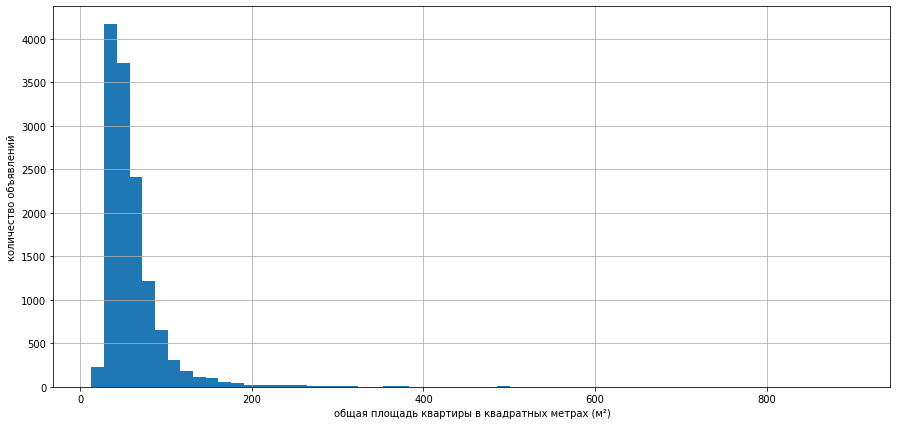

In [88]:
graph = data['total_area'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('общая площадь квартиры в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

Основные площади скопились в диапазоне от 20 до 100 м2, построю гистограмму с диапазоном 0-150, чтобы рассмотреть детальнее.

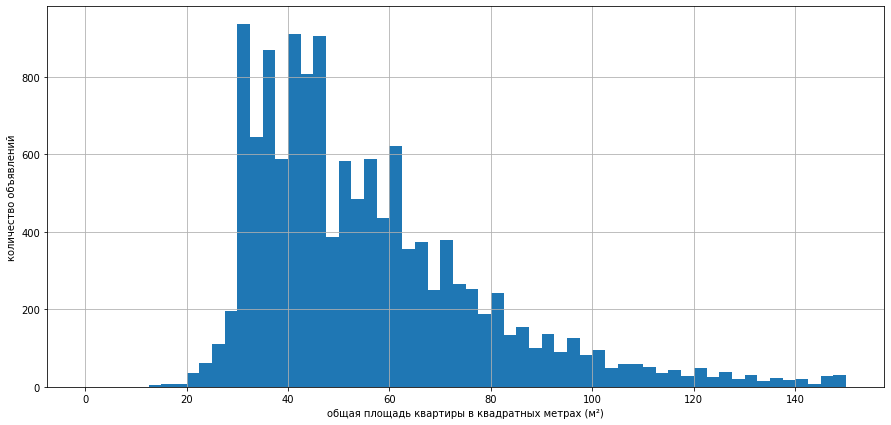

In [89]:
graph = data['total_area'].hist(figsize=(15, 7), bins=60, range=(0, 150))
graph.set_xlabel('общая площадь квартиры в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

В таком варианте уже лучше видно значения. Основная масса квартир представленная в датасете, соответствует общей площади 30-60 м2. Что соответствует типичной застройки России.

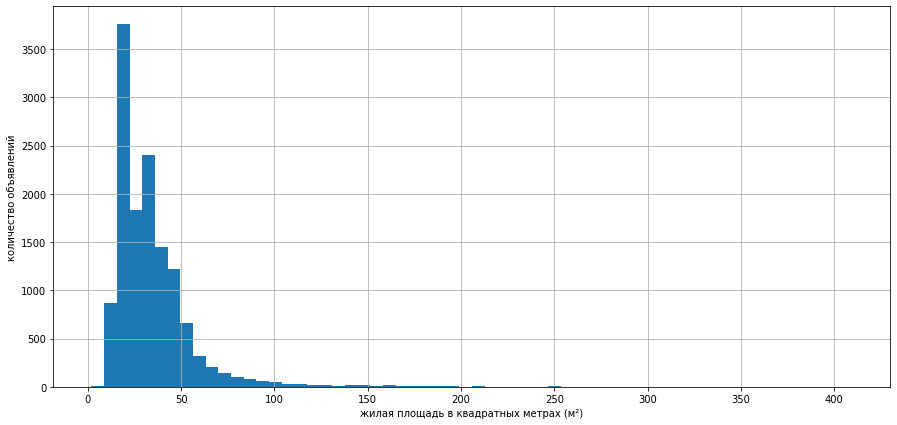

In [90]:
graph = data['living_area'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('жилая площадь в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

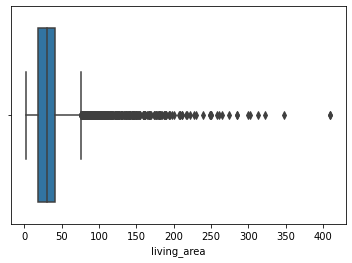

In [91]:
sns.boxplot(x=data['living_area'])
plt.show()

При рассмотрении жилой площади, на гистограмме наблюдаются пики в диапазоне 20-25 и 30-35 м2. Также по диаграмме размаха, можно увидеть, что большая часть значений лежит в диапазоне до 50 м2, что выглядит правдоподобно. 1-й квартиль находится в диапазоне 20 м2, что тоже похоже на правду. Сокращу на гистограмме диапазон до 80 м2, чтобы детальнее рассмотреть.

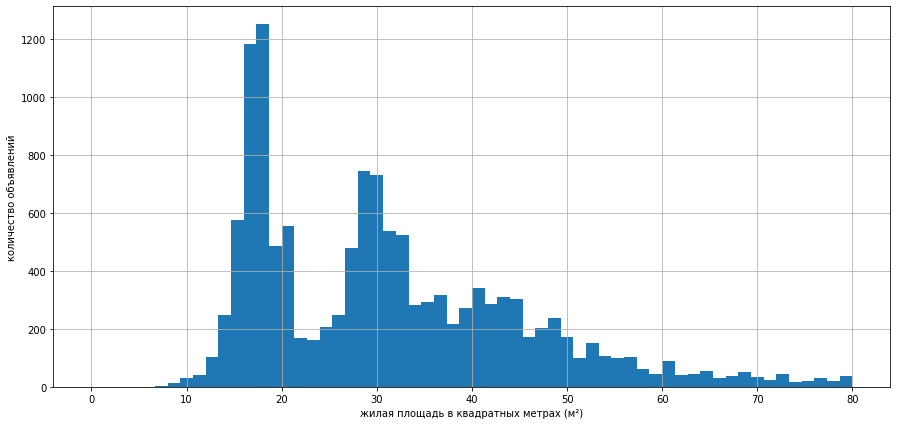

In [92]:
graph = data['living_area'].hist(figsize=(15, 7), bins=60, range=(0, 80))
graph.set_xlabel('жилая площадь в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

На данной гистограмме, видно, что действительно, основные значения жилой площади лежат в диапазоне от 15 до 45 м2. Предполагаю, что самыми популярными квартирами для продажи, являются 1 и 2-х комнатные квартиры.

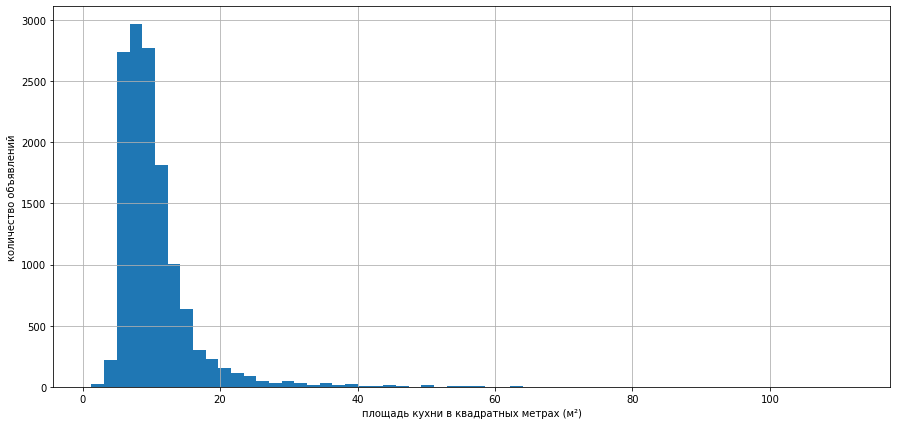

In [93]:
graph = data['kitchen_area'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('площадь кухни в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

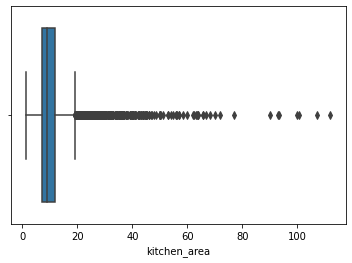

In [94]:
sns.boxplot(x=data['kitchen_area'])
plt.show()

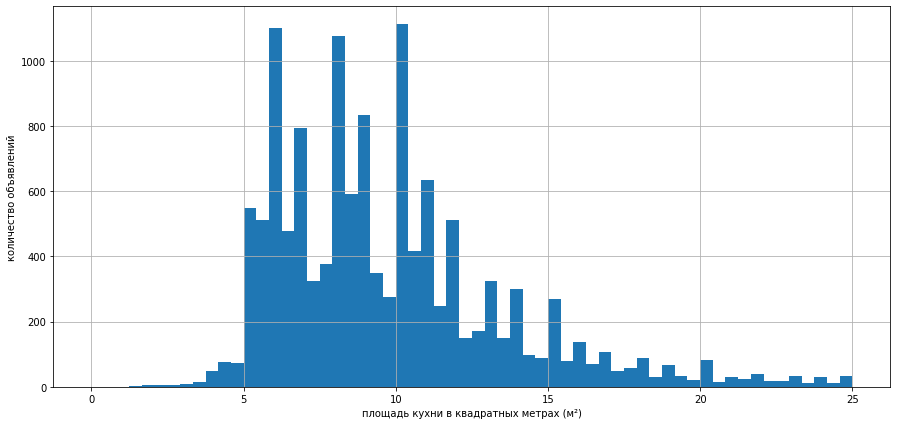

In [95]:
graph = data['kitchen_area'].hist(figsize=(15, 7), bins=60, range=(0, 25))
graph.set_xlabel('площадь кухни в квадратных метрах (м²)')
graph.set_ylabel('количество объявлений')
plt.show()

Изучив графики с площадью кухни, могу сказать что данные значения полностью соответствуют общей и жилой площадям. Основные значения находятся в диапазоне от 5 до 12 м2, что является нормальным. Есть выбивающиеся значения в 100 м2, но в соотношении с квартирой в 800 м2, данные значения возможны.

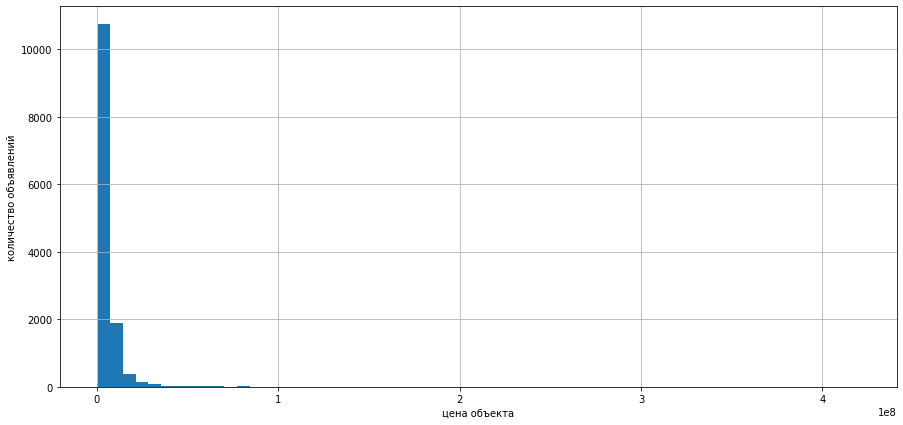

In [96]:
graph = data['last_price'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('цена объекта')
graph.set_ylabel('количество объявлений')
plt.show()

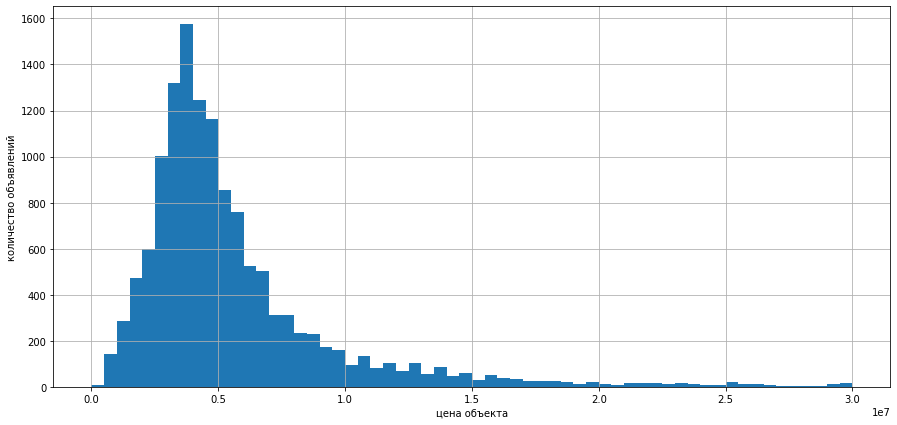

In [97]:
graph = data['last_price'].hist(figsize=(15, 7), bins=60, range=(0, 30_000_000))
graph.set_xlabel('цена объекта')
graph.set_ylabel('количество объявлений')
plt.show()

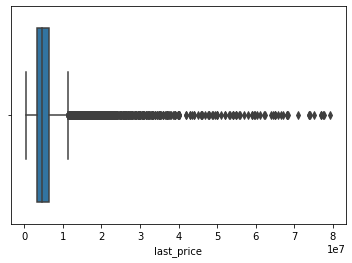

In [98]:
prise = data[data['last_price'] < 80_000_000]
sns.boxplot(x=prise['last_price'])
plt.show()

На данных графиках, можно увидеть, что основной диапазон цены составляет 3,5 - 7 млн. рублей, что выглядит правдоподобно. По диаграмме размаха был выставлен диапазон до 80 млн., чтобы была возможность визуально оценить характеристики распределения. 

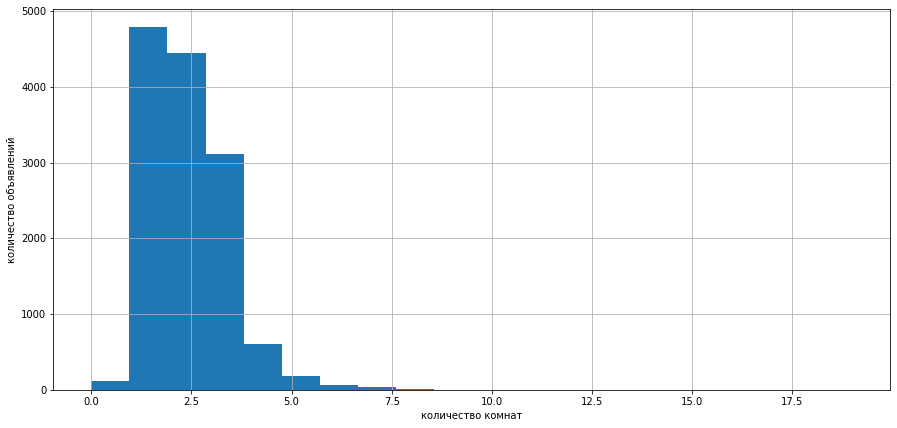

In [99]:
graph = data['rooms'].hist(figsize=(15, 7), bins=20)
graph.set_xlabel('количество комнат')
graph.set_ylabel('количество объявлений')
plt.show()

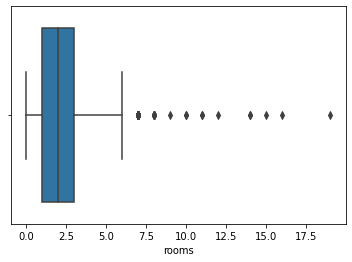

In [100]:
sns.boxplot(x=data['rooms'])
plt.show()

Моя гипотеза, о том, что самыми популярными квартирами для продажи, являются 1 и 2-х комнатные квартиры не совсем подтвердилась. На графиках можно увидеть, что наиболее популярны квартиры с 2 или 3 комнатами, далее по популярности идут однокомнатные квартиры. Видны и выбросы, о квартирах свыше 8 комнат, но возможно, это является правдой.

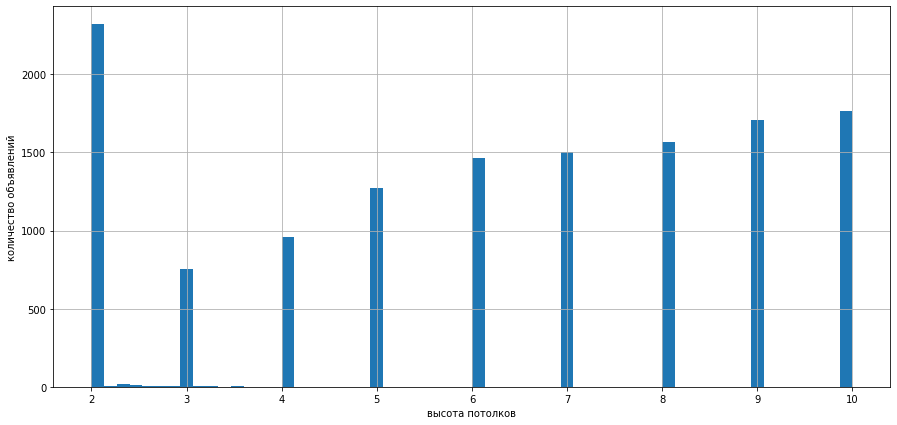

In [101]:
graph = data['ceiling_height'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('высота потолков')
graph.set_ylabel('количество объявлений')
plt.show()

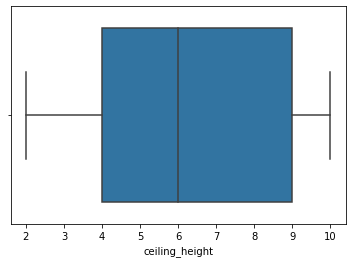

In [102]:
sns.boxplot(x=data['ceiling_height'])
plt.show()

На графиках видно, что основной диапазон значений лежит в районе 2,5-2,7 м, что является нормой. Заметно небольшое количество квартир с потолками около 4-х метров, думаю, это двухуровневые квартиры. Так же видны, единичные квартиры с потолками свыше 4 метров.

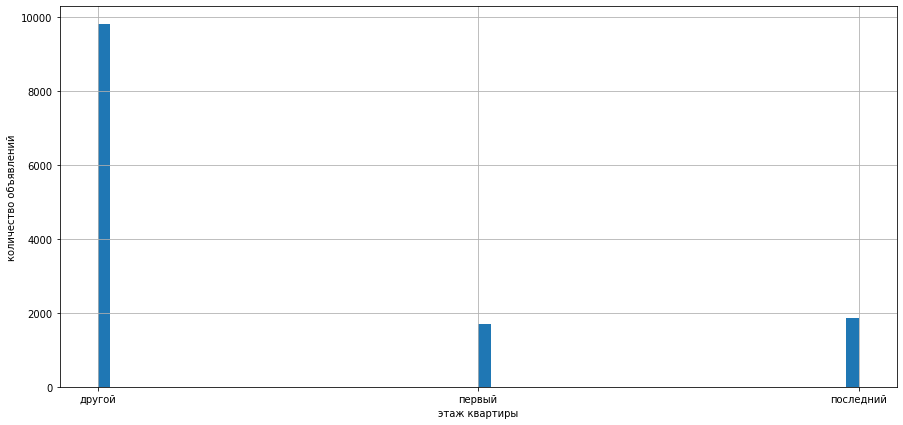

In [103]:
graph = data['type_floor'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('этаж квартиры')
graph.set_ylabel('количество объявлений')
plt.show()

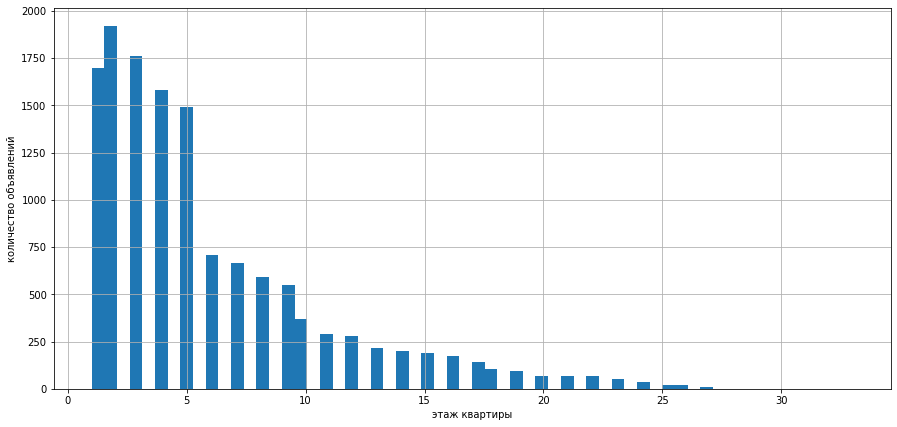

In [104]:
graph = data['floor'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('этаж квартиры')
graph.set_ylabel('количество объявлений')
plt.show()

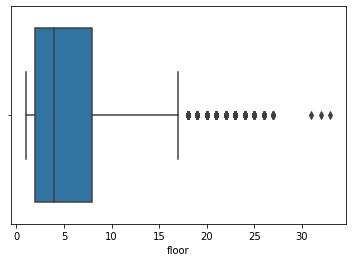

In [105]:
sns.boxplot(x=data['floor'])
plt.show()

На графиках, можно заметить, что основная часть объявлений соответствует квартирам с промежуточными этажами (от 2 до 8), наименьшее количество квартир имеющих первый этаж (около 3-х тысяч), чуть больше квартир с последним этажом (около 3,5 тысяч). Видны и единичные квартиры находящиеся выше 17 этажа. 

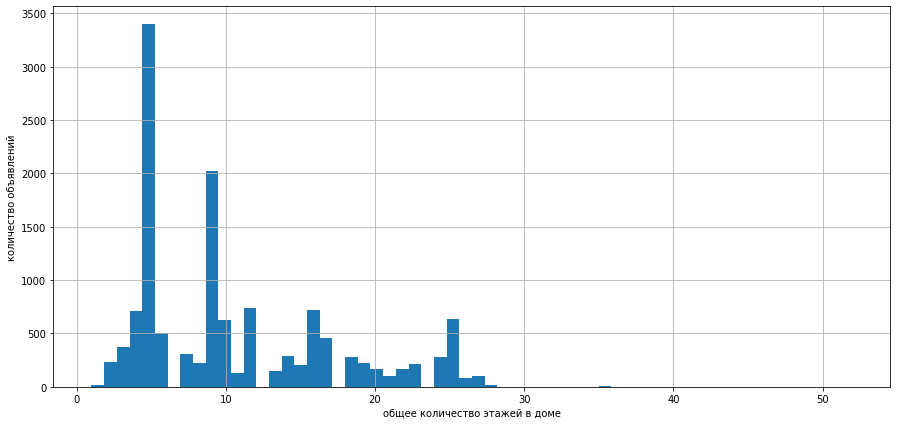

In [106]:
graph = data['floors_total'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('общее количество этажей в доме')
graph.set_ylabel('количество объявлений')
plt.show()

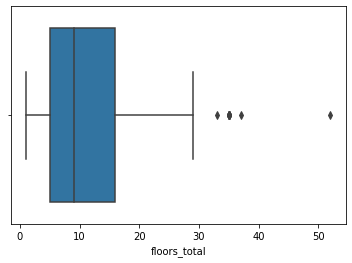

In [107]:
sns.boxplot(x=data['floors_total'])
plt.show()

Большие пики видны у 5-ти  и 9-ти этажек. Чуть менее популярны дома с этажностью выше 9 и ниже 5. Наблюдаются единичные дома с этажностью более 29 этажей.

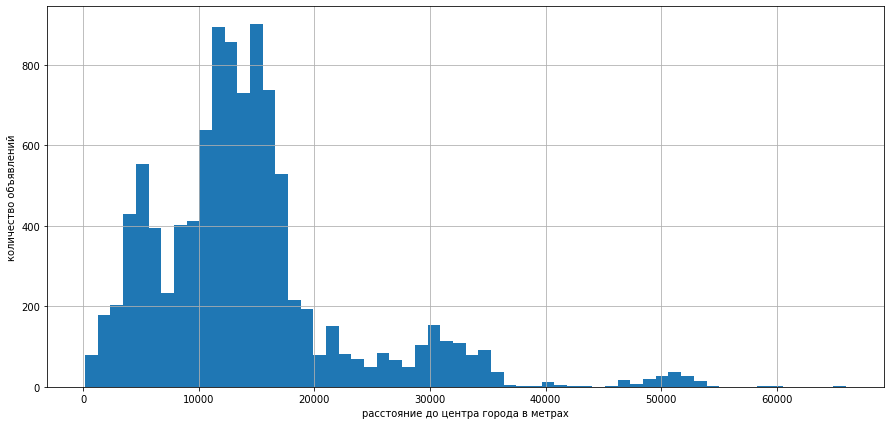

In [108]:
graph = data['cityCenters_nearest'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('расстояние до центра города в метрах')
graph.set_ylabel('количество объявлений')
plt.show()

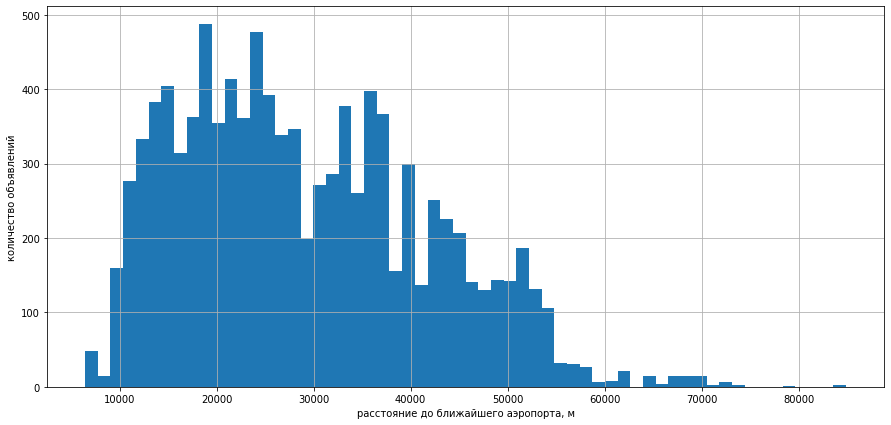

In [109]:
graph = data['airports_nearest'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('расстояние до ближайшего аэропорта, м')
graph.set_ylabel('количество объявлений')
plt.show()

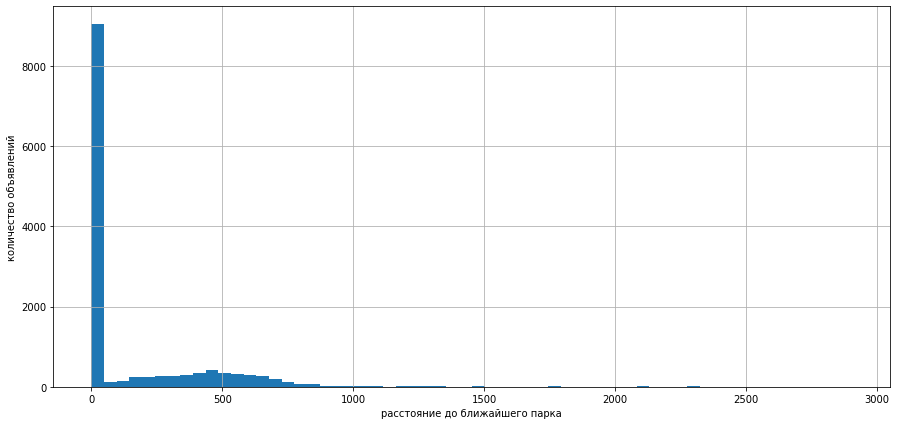

In [110]:
graph = data['parks_nearest'].hist(figsize=(15, 7), bins=60)
graph.set_xlabel('расстояние до ближайшего парка')
graph.set_ylabel('количество объявлений')
plt.show()

Рассмотрев гистограммы по трем параметрам, можно сказать, что большинство продаваемых квартир расположены в 10-15 км от центра города, с отдаленностью от аэропорта в 10-40 км и пешей доступностью парков, около 500 м. Значения относящиеся к 0, являются заполнением пустых значений, к объявлениям не имеющим парки в радиусе 3 км.

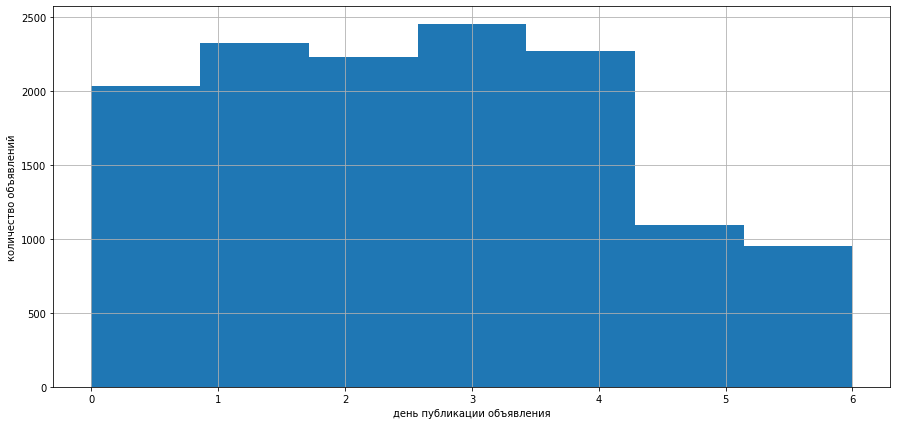

In [111]:
graph = data['weekday_of_publication'].hist(figsize=(15, 7), bins=7)
graph.set_xlabel('день публикации объявления')
graph.set_ylabel('количество объявлений')
plt.show()

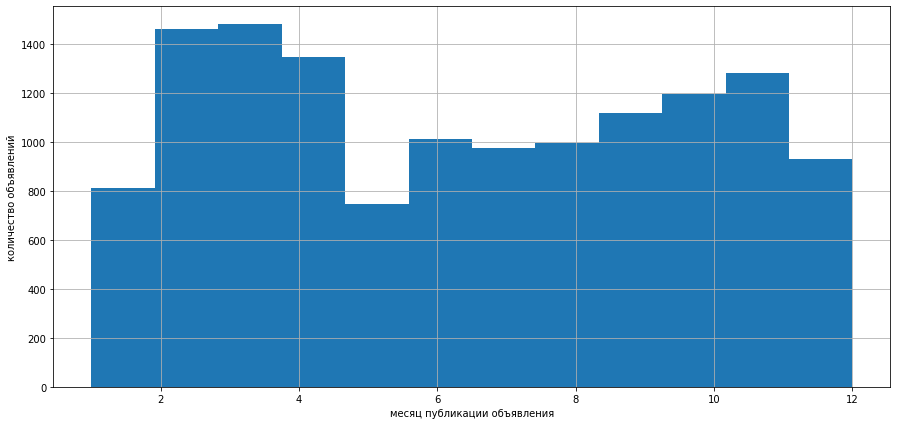

In [112]:
graph = data['month_of_publication'].hist(figsize=(15, 7), bins=12)
graph.set_xlabel('месяц публикации объявления')
graph.set_ylabel('количество объявлений')
plt.show()

По данным графикам, можно сказать, что объявления добавляют в основном в будние дни и самыми популярными месяцами для размещения объявлений, являются весенние и осенние месяцы.

Теперь необходимо посмотреть сколько дней обычно занимает продажа квартиры. Для начала уберу пропуски в столбце.

In [113]:
sale_days = data.query('days_exposition != "NaN" & days_exposition > 1')

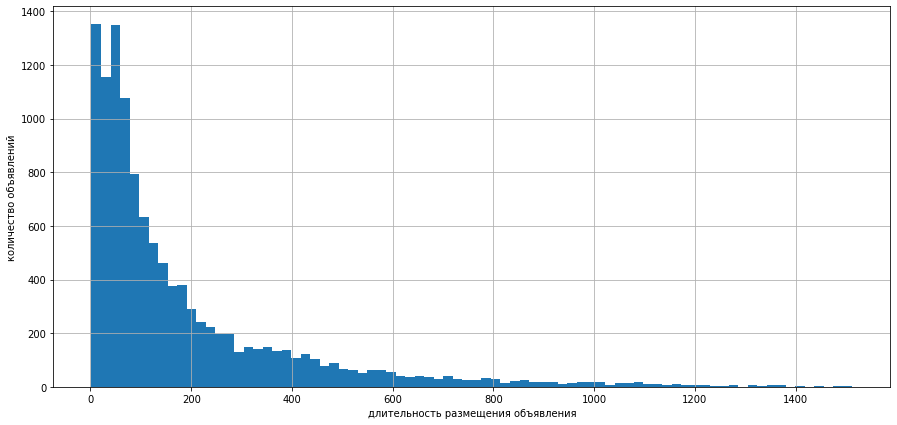

In [114]:
graph = sale_days['days_exposition'].hist(figsize=(15, 7), bins=80)
graph.set_xlabel('длительность размещения объявления')
graph.set_ylabel('количество объявлений')
plt.show()

Основные значения скопились в диапазоне от 0 до 100 дней, построю гистограмму в данном диапазоном, чтобы рассмотреть детальнее.

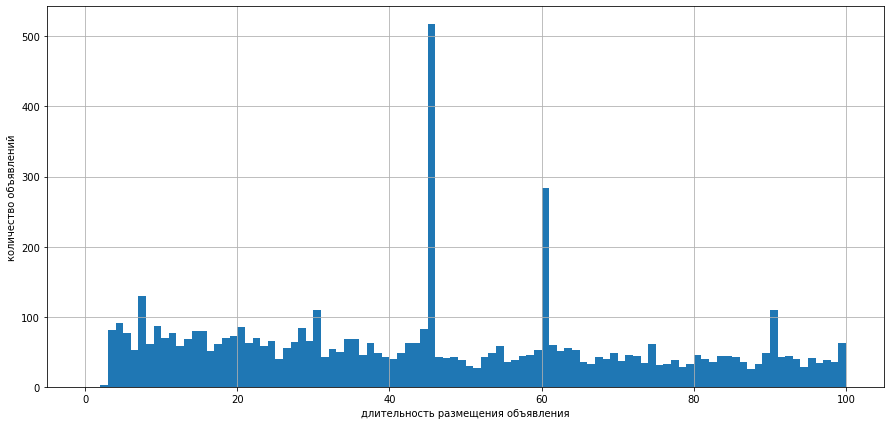

In [115]:
graph = sale_days['days_exposition'].hist(figsize=(15, 7), bins=100, range=(0, 100))
graph.set_xlabel('длительность размещения объявления')
graph.set_ylabel('количество объявлений')
plt.show()

In [116]:
sale_days['days_exposition'].describe()

count   11685.000000
mean      187.042276
std       226.138054
min         2.000000
25%        45.000000
50%       100.000000
75%       238.000000
max      1513.000000
Name: days_exposition, dtype: float64

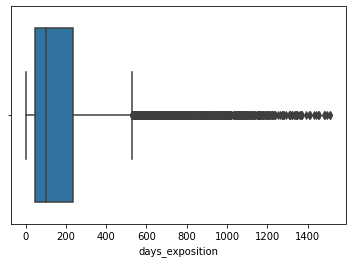

In [117]:
sns.boxplot(x=sale_days['days_exposition'])
plt.show()

In [118]:
sale_days['days_exposition'].mean()

187.04227642276422

In [119]:
sale_days['days_exposition'].median()

100.0

По графику видно, что большинство квартир продается в первые 100 дней, что в принципе для продажи недвижимости является нормой медиана данное утвердение подтверждает, а вот среднее значение указывает на то, что есть квартиры, которые продаются очень долго.

При рассмотрении диаграммы размаха, можно заметить, что публикация объявления свыше 500 дней уже является выбросом и можно сделать вывод, что это необычайно долго. А вот продажи в первые 40 дней можно считать быстрыми.

Так же стоит учесть по графику можно заметить выбивающиеся значения каждые, основные пики видны на 45 и 60 днях публикации объявлений и каждые последующие 15 дней. Предполагаю, что пользователь не самостоятельно снимает объявление с публикации в связи с продажей объекта, а сайт самостоятельно удаляет объявления по которым не было замечено никакой активности в данные периоды.

Далее рассмотрю какие факторы больше всего влияют на общую (полную) стоимость объекта. Рассмотрю корреляцию основных параметров.

In [120]:
data_corr = data[['last_price','total_area', 'living_area',\
                  'kitchen_area', 'rooms','type_floor',\
                  'weekday_of_publication','month_of_publication',\
                  'year_of_publication']]

<AxesSubplot:>

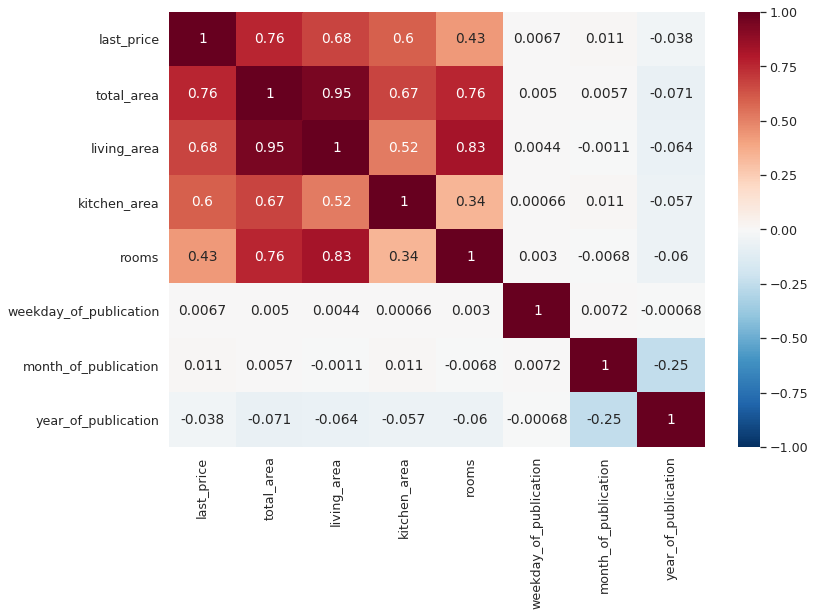

In [121]:
sns.set(font_scale=1.15)
plt.figure(figsize=(12,8))
sns.heatmap(
    data_corr.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

Глядя на матрицу корреляций, можно сказать, что на общую стоимость влияет площадь жилья. Так же заметна небольшая зависимость от количества комнат, но логично, что чем больше комнат, тем больше площадь. Так что стоимость опять сводится к площади квартиры.  
В матрицу корреляций не вошли значения по типу этажа квартиры, данный параметр и все остальные проверю отдельно.

In [122]:
data_floor = data_corr.pivot_table(index='type_floor', values='last_price', aggfunc=('median', 'mean')).round()
data_floor

,mean,median
type_floor,,
другой,6531815.000000,4700000.000000
первый,4532941.000000,3750000.000000
последний,6846727.000000,4060000.000000


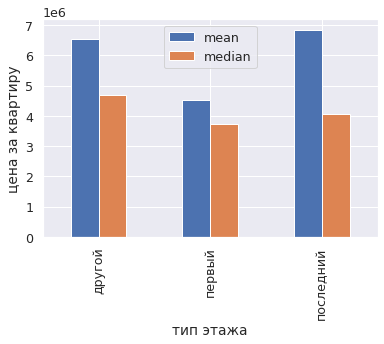

In [123]:
data_floor.plot.bar().set(ylabel='цена за квартиру', xlabel='тип этажа')
plt.show()

Глядя на график, можно сказать, что стоимость квартир на первом этаже, вне зависимости от медианного или среднего значения, ниже, чем стоимость квартир на последнем или каком-нибудь другом этажах.
Основной вывод, заключается в том, что стоимость квартиры зависит от площади и этажа, на котором она расположена.

In [124]:
data_total = data_corr.pivot_table(index='total_area', values='last_price', aggfunc=('median')).round()
data_total

,last_price
total_area,
13.000000,1625000.000000
13.200000,1686000.000000
14.000000,1190000.000000
15.000000,1725000.000000
15.500000,2450000.000000
...,...
507.000000,84000000.000000
590.000000,65000000.000000
618.000000,300000000.000000


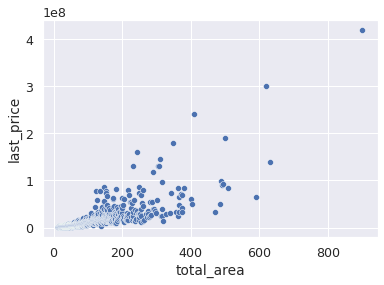

In [125]:
sns.scatterplot(x='total_area', y='last_price', hue=None, data=data_total, markers=True)
plt.show()

In [126]:
data_la = data_corr.pivot_table(index='living_area', values='last_price', aggfunc=('median')).round()
data_la

,last_price
living_area,
2.000000,6350000.000000
3.000000,4440000.000000
7.410000,1625000.000000
7.524000,1686000.000000
8.000000,8900000.000000
...,...
312.500000,49950000.000000
322.300000,140000000.000000
347.500000,91500000.000000


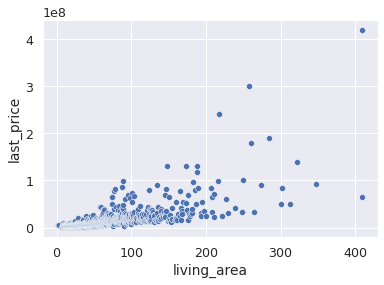

In [127]:
sns.scatterplot(x='living_area', y='last_price', hue=None, data=data_la, markers=True)
plt.show()

In [128]:
data_ka = data_corr.pivot_table(index='kitchen_area', values='last_price', aggfunc=('median')).round()
data_ka

,last_price
kitchen_area,
1.300000,4250000.000000
2.000000,2720000.000000
2.300000,2940000.000000
2.340000,1625000.000000
2.376000,1686000.000000
...,...
93.200000,82400000.000000
100.000000,65000000.000000
100.700000,12500000.000000


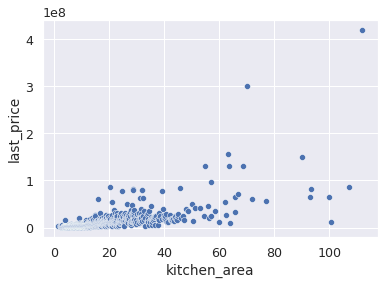

In [129]:
sns.scatterplot(x='kitchen_area', y='last_price', hue=None, data=data_ka, markers=True)
plt.show()

На графиках с площадьми видно, что зависимость стоимости объекта от площадей есть. Наблюдается положительная корреляция.

In [130]:
data_room = data_corr.pivot_table(index='rooms', values='last_price', aggfunc=('median', 'mean')).round()
data_room

,mean,median
rooms,,
0,3527567.000000,2700000.000000
1,3725195.000000,3500000.000000
2,5413894.000000,4600000.000000
3,8086191.000000,6100000.000000
4,12811349.000000,9200000.000000
5,23879120.000000,14000000.000000
6,35655689.000000,20000000.000000
7,42035897.000000,26750000.000000
8,43733333.000000,19900000.000000


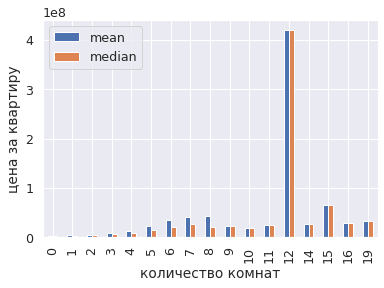

In [131]:
data_room.plot.bar().set(ylabel='цена за квартиру', xlabel='количество комнат')
plt.show()

При отдельном рассмотрении зависимости цены на количество комнат, можно увидеть небольшую положительную корреляцию по медианным значениям, по средним же значениям виден небольшой разброс в ценах, скорее всего из-за выбивающихся значений, буду опираться на медиану. Думаю, небольшая положительная корреляция обусловлена тем, что количество комнат влияют на общую площадь объекта, а как уже известно, площадь влияет на рост цены.
Также заметно выбивающееся значение цены в 12-ти комнатной квартире, на данное значение не стоит обращать внимание при общем рассмотрении, оно вероятнее всего аномальное для рассмотрения данной зависимости.

In [132]:
data_w = data_corr.pivot_table(index='weekday_of_publication', values='last_price', aggfunc=('median')).round()
data_w

,last_price
weekday_of_publication,
0,4500000
1,4500000
2,4500000
3,4500000
4,4400000
5,4400000
6,4450000


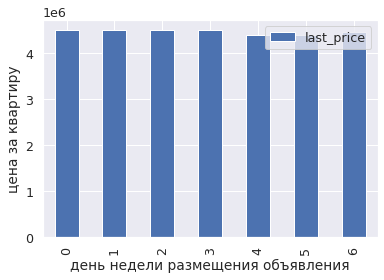

In [133]:
data_w.plot.bar().set(ylabel='цена за квартиру', xlabel='день недели размещения объявления')
plt.show()

In [134]:
data_m = data_corr.pivot_table(index='month_of_publication', values='last_price', aggfunc=('median')).round()
data_m

,last_price
month_of_publication,
1,4500000
2,4500000
3,4499000
4,4600000
5,4499000
6,4282546
7,4450000
8,4500000
9,4550000


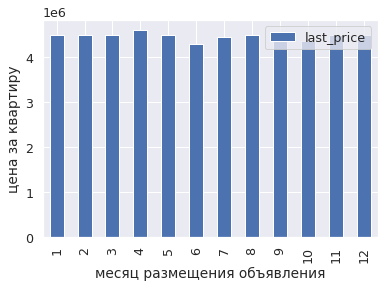

In [135]:
data_m.plot.bar().set(ylabel='цена за квартиру', xlabel='месяц размещения объявления')
plt.show()

In [136]:
data_y = data_corr.pivot_table(index='year_of_publication', values='last_price', aggfunc=('median')).round()
data_y

,last_price
year_of_publication,
2014,7300000
2015,5230000
2016,4350000
2017,4395000
2018,4365000
2019,4900000


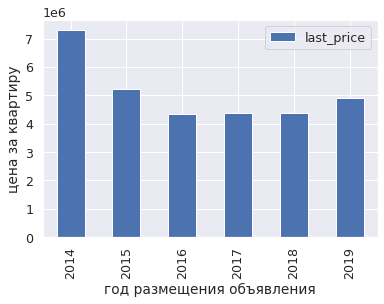

In [137]:
data_y.plot.bar().set(ylabel='цена за квартиру', xlabel='год размещения объявления')
plt.show()

Рассмотрев графики даты размещения объявлений, можно уверенно сказать, что на стоимость объекта не влияет день, месяц или год размещения объявлений.

Теперь, рассмотрю 10 населенных пунктов с наибольшим числом объявлений с самой высокой и низкой стоимостью квадратного метра.

In [138]:
data_name = data.pivot_table(index='locality_name', values='price_m2', aggfunc=('count', 'median')).round()
data_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,8668,103846.000000
Мурино,377,86119.000000
Кудрово,284,92742.000000
Шушары,260,77385.000000
Всеволожск,231,65789.000000
Пушкин,217,100486.000000
Парголово,206,92800.000000
Гатчина,198,66667.000000
Колпино,174,75449.000000


По данной таблице, можно сделать вывод, что самая высокая стоимость квадратного метра среди населенных пунктов с наибольшим числом объявлений в Санкт-Петербурге, а самая низкая в Выборге.

Теперь рассмотрю, как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города.

In [139]:
peter_price = data.query('locality_name == "Санкт-Петербург"')

In [140]:
data_sp = peter_price.pivot_table(index='city_centers_km', values='last_price', aggfunc='median')
data_sp

,last_price
city_centers_km,
0.000000,13500000.000000
1.000000,11750000.000000
2.000000,10300000.000000
3.000000,8409000.000000
4.000000,8990000.000000
5.000000,9400000.000000
6.000000,8818909.500000
7.000000,7200000.000000
8.000000,6995000.000000


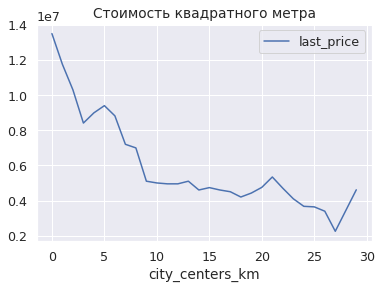

In [141]:
data_sp.plot(title = 'Стоимость квадратного метра')
plt.show()

Как и предполагалось. Чем ближе к центру, тем дороже квартиры, четко виден перепад на 8 км, думаю, черта центра города находится в радиусе 8 км. Также виден резкий подъем на 27 км, думаю, это выбивающееся значение, которое не влияет на общую тенденцию спада зависимости цены от расстояния до центра города. 

***Вывод:***

После проведенного исследовательского анализа данных, можно сказать, что:
- больше всего объявлений о продаже 2-х и 3-х комнатных квартир
- основная часть объектов продается в течении 100 дней с момента публикации объявления
- объявления в основном публикуют в будни
- общая стоимость объекта зависит от типа этажа квартиры, площади и расположения от центра города.

### Общий вывод

Основная задача данного проекта, звучала так — выполнить предобработку данных и изучить данные, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

В ходе проделанной работы, была произведена предобработка данных, в которой были заполнены пропущенные значения, изменены типы данных, устранены неявные дубликаты и устранены редкие и выбивающиеся значения (аномалии).
В дальнейшем был проведен исследовательский анализ с изучением параметров и зависимостей которые влияют на рынок недвижимости.

В итоге получены следующие результаты:
1. Общая стоимость объекта зависит от типа этажа квартиры, площади и расположения от центра города
2. Цена не зависит от года, месяца или дня недели публикации
3. На рынке недвижимости в основном представлены 2-х и 3-х комнатные квартиры
4. Объекты в основном продаются в течении 100 дней с момента публикации
5. Большинство объектов представлено с общей площадью от 30 до 80 м2
6. Наибольшее количество объявлений с объектами в 5-ти и 9-ти этажных домах
7. Объявления в основном публикуют в будние дни.